# Beginning Maps

---


### Imports

In [53]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import geopandas as gpd
from ipyleaflet import Map, GeoJSON, basemaps, basemap_to_tiles, Heatmap, Circle, LayerGroup, LayersControl, DOMWidget
import json
from matplotlib import pyplot as plt
from descartes import PolygonPatch

### Data

In [2]:
ic_polys_f = '../data/maps/ic-polygons.geojson'
with open(ic_polys_f) as f:
    ic_polys = json.load(f)
    
coords_f = '../data/johnson-cnty-coords.csv'
coords_df = pd.read_csv(coords_f)

In [3]:
def get_coords(df):
    return list(zip(df.latitude, df.longitude, [1 for i in range(len(df))]))

### Map - Base

In [39]:
bbox = {
    'top': 41.6883,
    'right': -91.4679,
    'bottom': 41.6077,
    'left': -91.6272
}

center = [
    (bbox['top']  + bbox['bottom']) / 2,
    (bbox['left'] + bbox['right']) / 2
]

zoom = 14

base = basemap_to_tiles(basemaps.Stamen.Toner)

#### Polygons

In [5]:
data = GeoJSON(
    data=ic_polys,
    style={
        'color': '#333333',
        'opacity': 0.7,
        'weight': 1,
        'fillColor': 'grey',
        'fillOpacity': 0.9
    }
)

#### Markers

In [6]:
def create_circle_layer(df, radius):
    circles = [Circle(location=coord[0:2], radius=radius) for coord in get_coords(df.sample(1000))]
    return LayerGroup(layers=circles)
circle_layer = create_circle_layer(coords_df, 5)

#### Heat Map

In [50]:
"""heat = Heatmap(
    locations=get_coords(coords_df),
    radius=3,
    blur=3
)"""

get_heat_map = lambda cmap: dict(zip([0.1, 0.25, 0.5, 0.75, 0.9], cmap))
yr_cmap  = {
    'junior':   get_heat_map(['#fee5d9','#fcae91','#fb6a4a','#de2d26','#a50f15']),
    'senior':   get_heat_map(['#eff3ff','#bdd7e7','#6baed6','#3182bd','#08519c']),
    'postgrad': get_heat_map(['#edf8e9','#bae4b3','#74c476','#31a354','#006d2c'])
}

def make_yr_heatmap(yr):
    yr_df = coords_df[coords_df['year'] == yr]
    gradient = yr_cmap[yr]
    heat = Heatmap(locations=get_coords(yr_df), radius=3, blur=3, gradient=gradient)
    heat_layer = LayerGroup(layers=[heat], name=yr)
    return heat_layer

In [54]:
?DOMWidget

In [56]:
controller = LayersControl()
dom = DOMWidget()

In [65]:
from IPython import display

In [ ]:
display(dom.widgets)

In [51]:
heat_jr = make_yr_heatmap('junior')
heat_sr = make_yr_heatmap('senior')
heat_pg = make_yr_heatmap('postgrad')

In [52]:
M = Map(center=center, zoom=zoom)
M.add_layer(base)
#M.add_layer(data)
M.add_control(controller)

M.add_layer(heat_jr)
M.add_layer(heat_sr)
M.add_layer(heat_pg)

M.

M

Map(basemap={'max_zoom': 19, 'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'attribution': 'Map …

### Polygon Map w/ Matplotlib

In [9]:
class MatplotlibMap:
    def __init__(self, polygons=[]):
        self.polygons = []
        self.BLUE = '#6699cc'
        self.dark = '#333333'
        self.light= '#e8e8e8'
        
        self.add_polygons(polygons)
    
    def add_polygon(self, feature):
        geometry = feature['geometry']
        polygon  = PolygonPatch(geometry,
                                fc=self.light,
                                ec=self.dark,
                                alpha=1)
        self.polygons.append(polygon)
        
    def add_polygons(self, l):
        for poly in l:
            self.add_polygon(poly)
        
    def get_point_map(self, points, color='steelblue'):
        fig, axes = self.get_map()
        
        axes.scatter(
            x=points.longitude,
            y=points.latitude,
            s=10,
            alpha=0.1,
            c=points.year.apply(lambda x: yr_map[x]),
            zorder=2
        )
        
        return fig
    
    def get_map(self):
        fig = plt.figure(figsize=(15, 7))
        ax = fig.gca()
        for poly in self.polygons:
            ax.add_patch(poly)
        
        ax.axis('scaled')
        return fig, ax
    
yr_map = {
    'junior': '#fbb4ae',
    'senior': '#b3cde3',
    'postgrad': '#ccebc5',
    'none': 'steelblue'
}

All Years


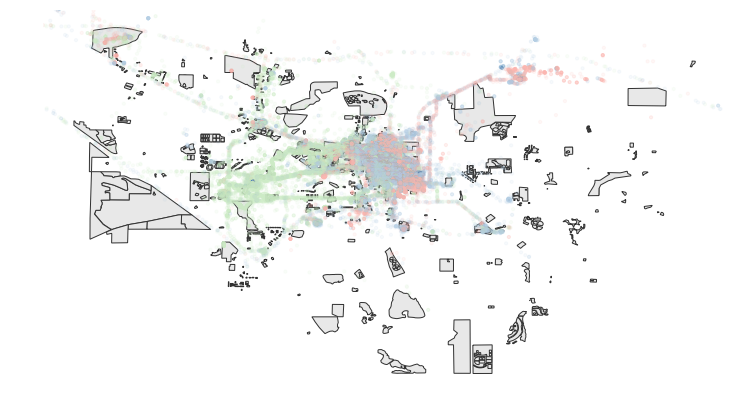

In [10]:
MM = MatplotlibMap(polygons=ic_polys['features'][::-1])
MM.get_point_map(coords_df)

print ('All Years')
plt.axis('off')
plt.show()

junior


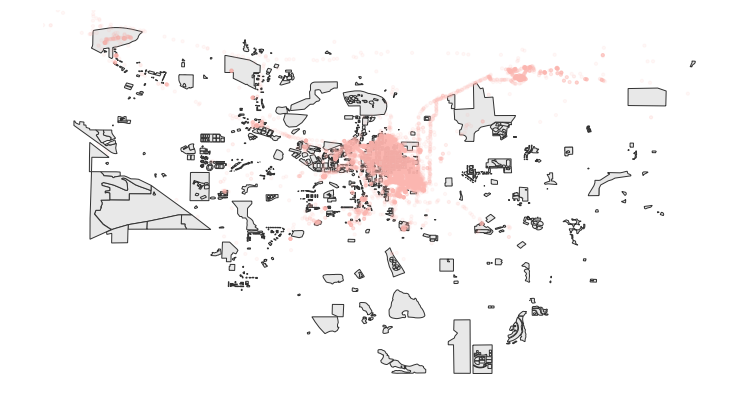

senior


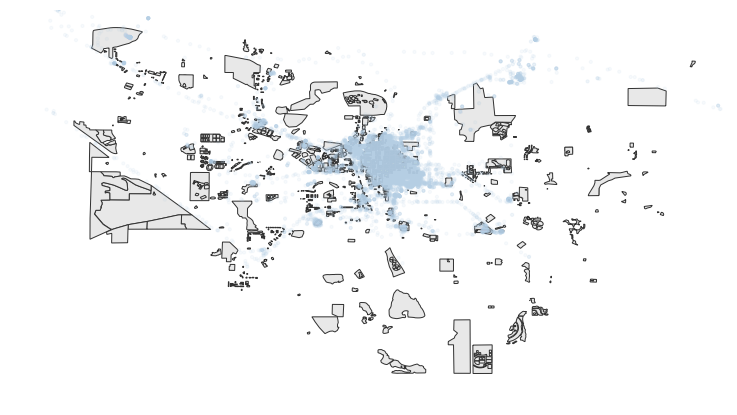

postgrad


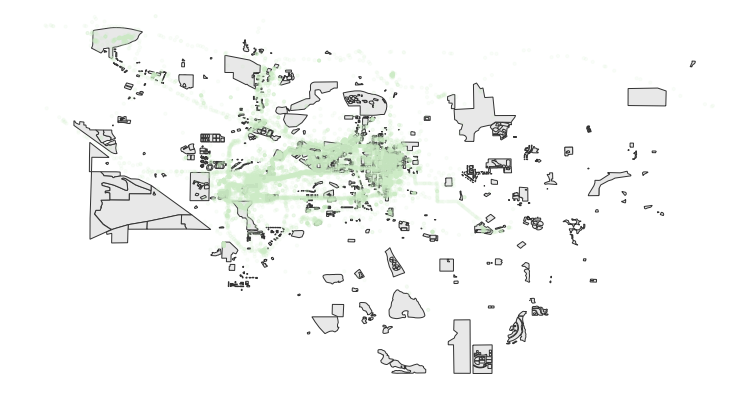

In [11]:
for yr in ['junior', 'senior', 'postgrad']:
    MM = MatplotlibMap(polygons=ic_polys['features'][::-1])
    
    yr_pts = coords_df[coords_df['year'] == yr]
    yr_color = yr_map[yr]
    
    fig = MM.get_point_map(yr_pts, yr_color)
    print (yr)
    plt.axis('off')
    plt.show()

Business Hours Locations


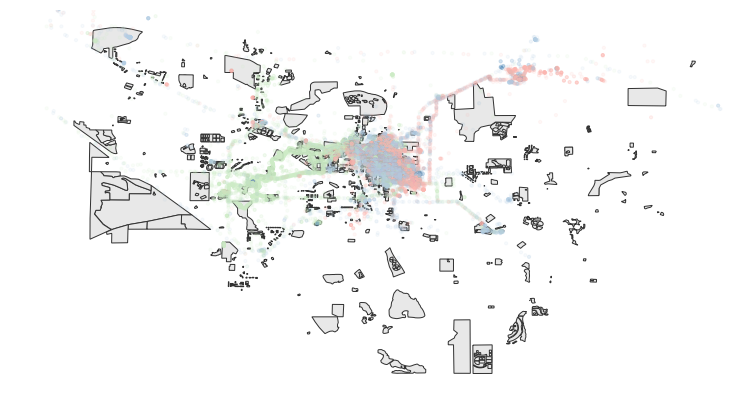

In [12]:
business_coords = coords_df[coords_df.business == True]
MM = MatplotlibMap(polygons=ic_polys['features'][::-1])
fig = MM.get_point_map(business_coords, 'notsteelblue')
    
print ('Business Hours Locations')
plt.axis('off')
plt.show()

Weekend Locations


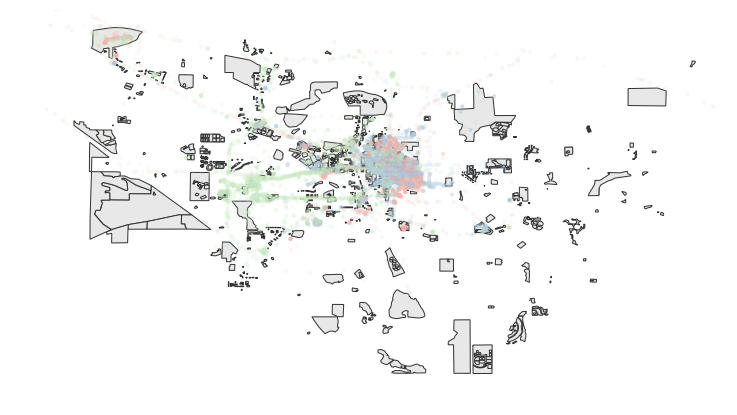

In [13]:
weekend_coords = coords_df[coords_df.weekend == True]

MM = MatplotlibMap(polygons=ic_polys['features'][::-1])

fig = MM.get_point_map(weekend_coords, 'notsteelblue')
    
print ('Weekend Locations')
plt.axis('off')
plt.show()